In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import scqubits as scq
import numpy as np

# Calculations and Visualization

scqubits allows us to predict and visualize the qubit coherence times due to various noise channels. 


## Basic noise calculations
We start by instantiating a qubit object:

In [3]:
tune_tmon = scq.TunableTransmon(
    EJmax=20.0,
    EC=0.5,
    d=0.00,
    flux=0.1,
    ng=0.3,
    ncut=150
)

print(tune_tmon)

TUNABLETRANSMON
 ———— PARAMETERS ————
EJmax	: 20.0
EC	: 0.5
d	: 0.0
flux	: 0.1
ng	: 0.3
ncut	: 150
truncated_dim	: None
Hilbert space dimension	: 301


We can check what noise channels are supported by this qubit by calling

In [4]:
tune_tmon.supported_noise_channels()

['tphi_1_over_f_flux',
 'tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive_loss',
 't1_flux_bias_line',
 't1_charge_impedance']

Any of the above listed channels corresponds to a method that can be called directly. For example, to calculate the pure-dephasing time $T_{\phi}$ due to $1/f$ flux noise (with its default parmeters), we execute:

In [5]:
tune_tmon.tphi_1_over_f_flux()

8088.317057546059

The above result is given in inverse frequncy units. The default frequency units in scqubits are GHz. One can check the currently active unit setting by calling

In [6]:
scq.get_units()

'GHz'

Given the setting to GHz, the units of time are 1/GHz=$ns$. Accordingly, the above dephasing time is given in $ns$.

Instad of times all the noise functions can also return rates - this is done by passing the ``get_rate=True`` argument. 
Each of the noise methods also takes a variety of other arguments, allowing one to specify information ranging from what energy levels should be used in the calculations, to various noise strenghts, and noise operators - see specific method documentations for details. 

As an example of some of the non-default options, we consider a $T_1$ noise process due to direct coupling of the qubit to a charge line. The effects of such a noise channel can be calculated using a method called ``t1_charge_impedance``. For example, suppose we wish the calculate the rate for transitions between the 3rd and 1st energy levels, assuming a standard transmission line at a temperature of T=100mK. To obtain the resulting rate, we execute: 

In [7]:
tune_tmon.t1_charge_impedance(i=3, j=1, T=0.100, get_rate=True, total=False)

5.6155342733918754e-05

The option ``total=False`` in the above code signals that only the rate from level 3 to level 1 should be calculated, without inclusion of the upward (excitation) rate. The contribution from excitation processes is included by passing the option ``total=True`` (which is also the default for all the methods that consider $T_1$ processes).

## Visualization of coherence times 

A common way to understand and visualize how noise affects a given qubit, is to plot decoherence times as a function of one of the external parameters, such as the flux or charge offset. (Alternatively, it may be useful to consider how decoherence properties change as we vary one or more of the qubit's core energy parameters, such as $E_J$ or $E_C$).    Each noisy qubit provides a flexible method called ``plot_noise``, which facilitates this functionality. In the following, we give examples of some of this method's capabilities. 

To provide an overview of decoherence properties on, say, flux, the effect of all supported noise channels can be visualized one by one. (The calculated and plotted data are expressed in the currently set units, by default $ns$ and GHz, respectively.)

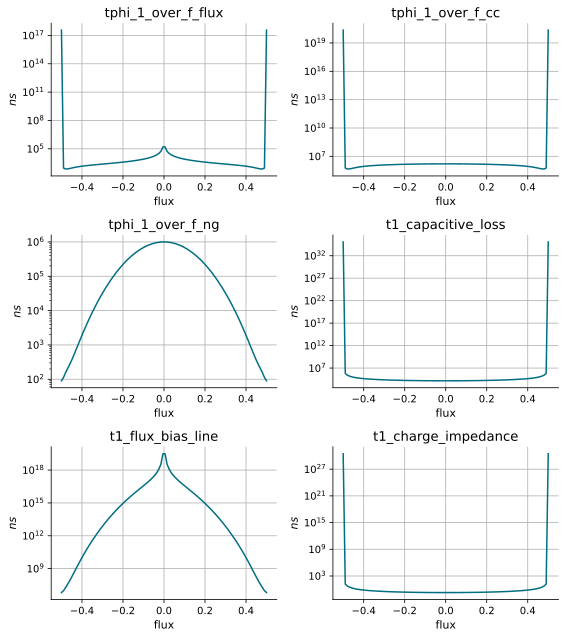

In [8]:
tune_tmon.plot_coherence_vs_paramvals(param_name='flux', param_vals=np.linspace(-0.5, 0.5, 100));

We can easily re-express the results in different time units by using the ``scale`` argument, for example ``scale=1e-3`` to convert times to $\mu s$. (Alternatively, before creating the qubit object, we could have changed the units to `MHz` via the ``set_units`` function.)

Instead of including all supported noise channels, we can also choose a few select ones. This is achieved by providing a list of specific noise channels that should be plotted. The plots can be customized either by passing plot options directly to the ``plot_coherence_vs_paramvals`` method, or by manipulating the properties of the matplotlib ``Axes`` object returned by ``plot_coherence_vs_paramvals``, as shown below.

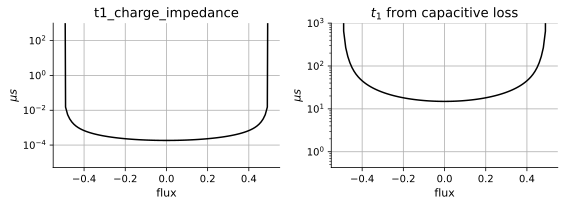

In [9]:
fig, ax = tune_tmon.plot_coherence_vs_paramvals(
    param_name='flux', 
    param_vals=np.linspace(-0.5, 0.5, 100), 
    noise_channels=['t1_charge_impedance', 't1_capacitive_loss'], 
    scale=1e-3, 
    ylabel=r"$\mu s$", 
    color='black', 
    ylim=(None, 1e3)
)

ax[1].set_title(r"$t_1$ from capacitive loss");   # customize the title

For additional control, we may choose to calculate coherences with non-default options for all the noise channels we want to plot. This can be done by passing a `common_noise_options` argument to `plot_coherence_vs_paramvals`, which contains a dictionary of option/value pairs. We can also choose different noise-specific options or each noise channel. This is possible by supplying the `noise_channels` argument with tuples containting (1) a noise-channel name, and (2) a dictionary with options that are internally used to calculate the noise. In the example below, we set a non-default temperature for all the provided noise channels to 100 $mK$, but also choose a non-default energy levels 3 and 2 for the ``t1_capacitive_loss`` noise channel calculation (instead of default 1 and 0).


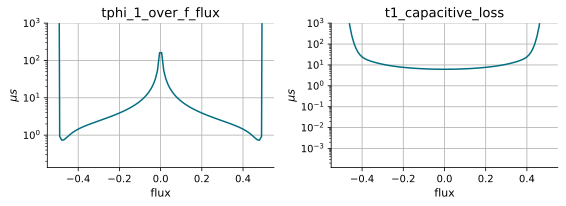

In [10]:
tune_tmon.plot_coherence_vs_paramvals(
                     param_name='flux',  
                     param_vals=np.linspace(-0.5, 0.5, 100), 
                     noise_channels = ['tphi_1_over_f_flux',
                                      ('t1_capacitive_loss', dict(i=3, j=2))],
                     common_noise_options=dict(T=0.100),
                     scale=1e-3, 
                     ylabel=r"$\mu s$", 
                     ylim=(None, 1e3)
                    );